In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_trafficsignsVN/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 7770 images belonging to 121 classes.
Found 405 images belonging to 121 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(121,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train,batch_size=512,epochs=150,verbose=1,validation_data=test)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


243/243 [==============================] - 1779s 7s/step - loss: 4.1994 - accuracy: 0.0740 - val_loss: 3.0213 - val_accuracy: 0.2519
Epoch 2/150
243/243 [==============================] - 24s 99ms/step - loss: 2.1441 - accuracy: 0.4042 - val_loss: 1.3995 - val_accuracy: 0.6123
Epoch 3/150
243/243 [==============================] - 25s 101ms/step - loss: 0.9716 - accuracy: 0.6860 - val_loss: 0.9603 - val_accuracy: 0.7309
Epoch 4/150
243/243 [==============================] - 24s 99ms/step - loss: 0.6030 - accuracy: 0.7855 - val_loss: 0.8359 - val_accuracy: 0.7481
Epoch 5/150
243/243 [==============================] - 24s 98ms/step - loss: 0.4444 - accuracy: 0.8363 - val_loss: 0.7806 - val_accuracy: 0.7728
Epoch 6/150
243/243 [==============================] - 24s 98ms/step - loss: 0.3898 - accuracy: 0.8490 - val_loss: 0.6943 - val_accuracy: 0.7975
Epoch 7/150
243/243 [==============================] - 24s 100ms/step - loss: 0.3092 - accuracy: 0.8699 - val_loss: 0.5634 - val_accuracy: 0.

In [ ]:
model.save('CNN_SignTrafficVN.h5')

Test loss=  1.0377252101898193
Test accuracy=  0.8518518805503845


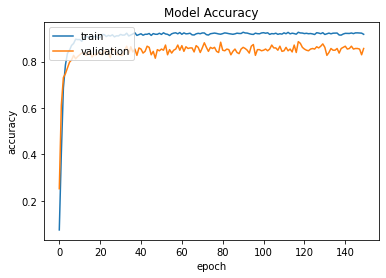

In [ ]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [ ]:
import pandas as pd
clases = pd.read_csv('/content/drive/MyDrive/Dataset_trafficsignsVN/class.csv')
clases = list(clases)
clases

['Duong Cam',
 'Cam Di Nguoc Chieu',
 'Cam O To',
 ' Cam O To Re Phai',
 'Cam O To Re Trai',
 'Cam Xe May',
 'Cam O To Va Xe May',
 'Cam Xe Tai',
 'Cam Xe Tai Tren 2.5 tan',
 ' Cam O To Khach Va O To',
 'Cam O To Ro-Mooc',
 'Cam May Keo',
 'Cam Xe Dap',
 'Cam Xe Dap Tho',
 'Cam Xe 3 va 4 Banh Tho So',
 'Cam Nguoi Di Bo',
 'Cam Xe Keo Day',
 'Cam Xe Suc Vat Keo',
 'Han Che Trong Luong Xe',
 'Han Che Trong Luong Truc Xe',
 'Han Che Chieu Cao Xe',
 'Han Che Chieu Rong Xe',
 'Han Che Chieu Dai O To',
 'Han Che Chieu Dai Ro-Mooc',
 'Khoang Cach Toi Thieu Giua Hai Xe',
 'Dung Lai',
 'Cam Re Trai',
 'Cam Re phai',
 'Cam Quay Dau',
 'Cam O To Quay Dau',
 'Cam Vuot',
 'Cam O To Vuot',
 'Toc Do Toi Da',
 'Cam Bop Coi',
 'Tram Thue Quan',
 'Cam Dung Va Do Xe',
 ' Cam Do Xe',
 'Cam Do Xe Ngay Le',
 ' Cam Do Xe Ngay Chan',
 'Nhuong Duong Cho Xe Co Gioi Di Nguoc Chieu Trong Duong Hep',
 'Het Cam Vuot',
 'Het Han Che Toi Da',
 'Het Tat Ca Cac Lenh Cam',
 'Cam Di Thang',
 'Cam Re Trai Va Phai',
 'Cam 

 Cam O To Re Phai


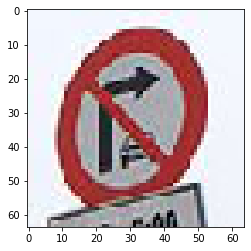

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img = load_img('1.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Cam O To Re Trai


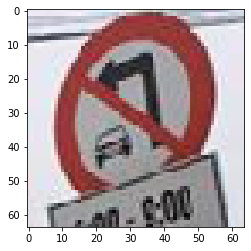

In [ ]:
import numpy as np
img = load_img('2.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Duong Cam


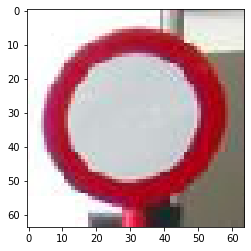

In [ ]:
import numpy as np
img = load_img('3.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

 Duong Ngam


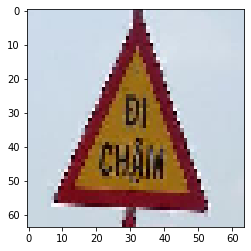

In [ ]:
import numpy as np
img = load_img('4.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Giao Nhau Voi Duong Khong Uu Tien.2


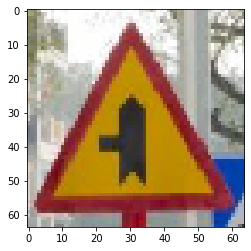

In [ ]:
import numpy as np
img = load_img('5.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

 Duong Hep Ben Trai


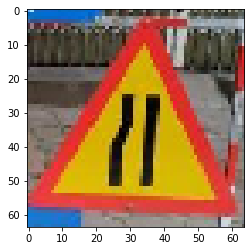

In [ ]:
import numpy as np
img = load_img('11.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Cong Truong


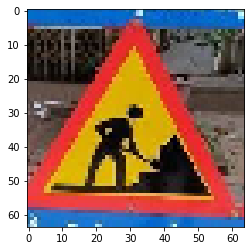

In [ ]:
import numpy as np
img = load_img('7.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Huong Di Vong Chuong Ngai Vat Sang Trai


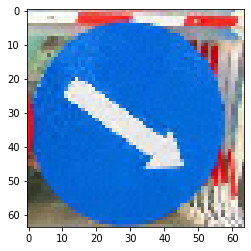

In [ ]:
import numpy as np
img = load_img('8.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Noi Giao Nhau Chay Theo Vong Tuyen


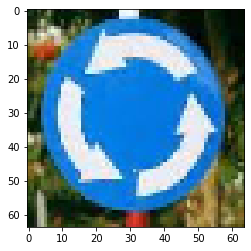

In [ ]:
import numpy as np
img = load_img('9.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

Vong Tranh Hai Ben


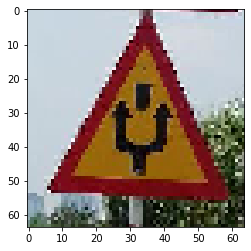

In [ ]:
import numpy as np
img = load_img('6.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

# **Tạo web test model bằng hình ảnh**

In [4]:
from keras.models import load_model
import pandas as pd
# Load model Nhận diện 
model = load_model("/content/drive/MyDrive/Dataset_trafficsignsVN/CNN_SignTrafficVN.h5")
#load nhãn cho model
classes = pd.read_csv('/content/drive/MyDrive/Dataset_trafficsignsVN/class.csv')
classes = list(classes)

In [7]:
import gradio as gr
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array

In [43]:
def predict_object(img):
  img = img_to_array(img)
  img = img.reshape(1,64,64,3) 
  print(classes[np.argmax(model.predict(img),axis=1)[0]])
  prediction= model.predict(img)[0]
  # cf = {classes[i]: float(predict_result[i]) for ỉ in range(len(predict_result))}
  cf = {classes[i]: float(prediction[i]) for i in range(121)}
  print(cf)
  return cf

In [44]:
gr.Interface(fn = predict_object,
             inputs = gr.inputs.Image(shape = (64,64)),
             outputs = gr.outputs.Label(num_top_classes=3),
             interpretation='default'
             ).launch(debug = True)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://26948.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Cac Xe Chi Duoc Di Thang
{'Duong Cam': 0.0, 'Cam Di Nguoc Chieu': 0.0, 'Cam O To': 0.0, ' Cam O To Re Phai': 0.0, 'Cam O To Re Trai': 0.0, 'Cam Xe May': 0.0, 'Cam O To Va Xe May': 0.0, 'Cam Xe Tai': 0.0, 'Cam Xe Tai Tren 2.5 tan': 0.0, ' Cam O To Khach Va O To': 0.0, 'Cam O To Ro-Mooc': 0.0, 'Cam May Keo': 0.0, 'Cam Xe Dap': 0.0, 'Cam Xe Dap Tho': 0.0, 'Cam Xe 3 va 4 Banh Tho So': 0.0, 'Cam Nguoi Di Bo': 0.0, 'Cam Xe Keo Day': 0.0, 'Cam Xe Suc Vat Keo': 0.0, 'Han Che Trong Luong Xe': 0.0, 'Han Che Trong Luong Truc Xe': 0.0, 'Han Che Chieu Cao Xe': 0.0, 'Han Che Chieu Rong Xe': 0.0, 'Han Che Chieu Dai O To': 0.0, 'Han Che Chieu Dai Ro-Mooc': 0.0, 'Khoang Cach Toi Thieu Giua Hai Xe': 0.0, 'Dung Lai': 0.0, 'Cam Re Trai': 0.0, 'Cam Re phai': 0.0, 'Cam Quay Dau': 0.0, 'Cam O To Quay Dau': 0.0, 'Cam Vuot': 0.0, 'Cam O To Vuot': 0.0, 'Toc Do Toi Da': 0.0, 'Cam Bop Coi': 0.0, 'Tram Thue Quan': 0.0, 'Cam Dung Va Do Xe': 0.0, ' Cam Do Xe': 0.0, 'Cam Do Xe Ngay Le': 0.0, ' Cam Do Xe Ngay Chan': 0

(<gradio.routes.App at 0x7f5cba96afd0>,
 'http://127.0.0.1:7860/',
 'https://26948.gradio.app')